In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
df = pd.read_csv('2.23.1 MC - Predicting Stock Prices - Part I/csv/Python 3 CSV/PG_2007_2017.csv', index_col = 'Date')

In [3]:
# first we need to estimate its historic log returns
# pct_change is a pandas library obtains simple returns from dataset

log_returns = np.log(1 + df.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


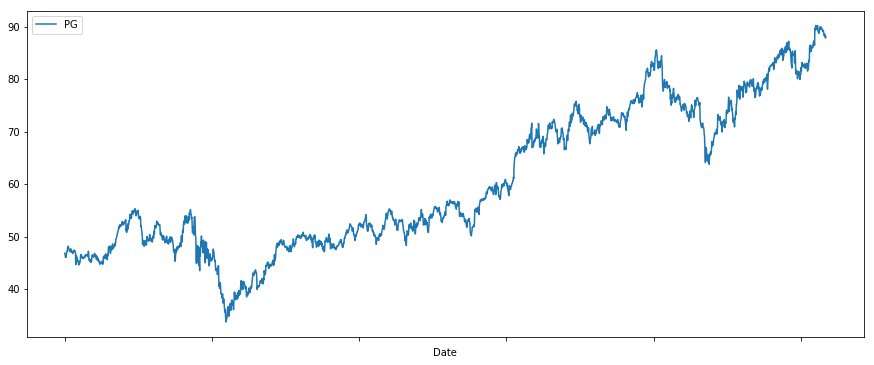

In [5]:
df.plot(figsize=(15,6))

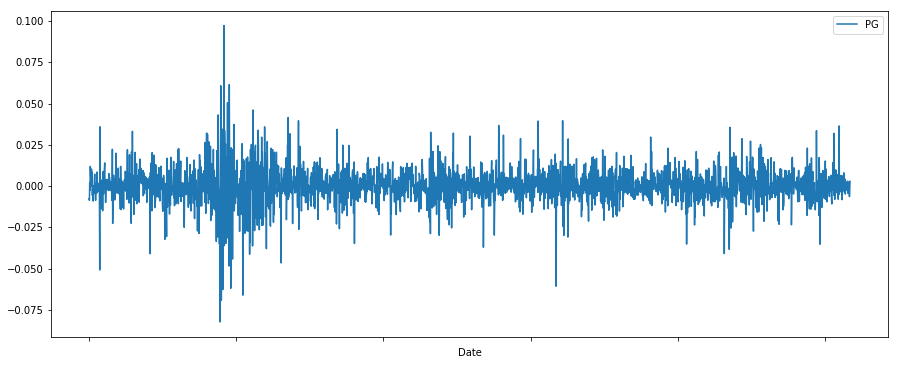

In [6]:
log_returns.plot(figsize=(15,6))

#### need to get the mean and variance for the brownian motion calculation 

In [7]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

#### *note: no need to annualize data because we are trying to predict daily stock price*

In [10]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

**Brownian Motion = drift + stdev * e^r**

## Part II

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
# need to put these into arrays to use them 

np.array(drift)

array([0.00018236])

In [14]:
drift.values

array([0.00018236])

In [15]:
stdev.values

array([0.0111381])

In [16]:
# need a random variable for the brownian motion calculation. Z corresponds to the distance between the mean and 
# the events, expressed as the number of standard deviations 

norm.ppf(0.95) #scipy norm 

1.6448536269514722

distance between the mean and Z is 1.65 standard deviations 

In [17]:
# need random variables 

x = np.random.rand(10, 2)
x

array([[0.41340695, 0.75203561],
       [0.85322915, 0.67276225],
       [0.56114594, 0.8763747 ],
       [0.8116957 , 0.1936106 ],
       [0.91739841, 0.50195788],
       [0.31584767, 0.50720456],
       [0.55806544, 0.8109482 ],
       [0.47004206, 0.57115138],
       [0.41524375, 0.0888651 ],
       [0.63390609, 0.85321032]])

In [18]:
norm.ppf(x) #distance between the random numbers above and the mean

array([[-0.21878967,  0.68090945],
       [ 1.05038379,  0.44755347],
       [ 0.15387522,  1.15705325],
       [ 0.88416233, -0.86466771],
       [ 1.38778282,  0.00490771],
       [-0.479342  ,  0.01806014],
       [ 0.14606622,  0.88139587],
       [-0.07516414,  0.17930626],
       [-0.21407637, -1.34777673],
       [ 0.34221669,  1.05030185]])

In [19]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.20410953,  1.01816925],
       [ 0.65852593, -0.8795786 ],
       [ 2.05005868, -0.20325704],
       [ 0.9484707 , -0.23367393],
       [-0.25072714, -0.14207317],
       [ 1.4481228 , -0.89520671],
       [ 0.16716682,  1.35582832],
       [-0.54404309, -1.10447225],
       [-0.12717589,  0.85964167],
       [-1.36913837,  0.25335041]])

In [20]:
t_intervals = 1000 #forecasting the stock price for the upcoming 1000 days
iterations = 10 # 10 series of future stock price predictions 

*daily returns = e^r*

*r = drift + stdev * Z*

In [21]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [22]:
daily_returns

array([[1.00329953, 1.01950179, 1.00838785, ..., 1.02779316, 1.02030559,
        1.00290593],
       [1.00549626, 0.99589068, 1.00367577, ..., 1.0116959 , 0.99445165,
        1.01302737],
       [1.00884606, 0.98771707, 1.00601812, ..., 0.99370596, 0.99897576,
        0.9826894 ],
       ...,
       [1.00170589, 1.00424341, 1.00273238, ..., 0.98825323, 1.01414896,
        0.9957934 ],
       [0.98745897, 1.00198836, 0.9928254 , ..., 0.99655679, 0.98994152,
        0.98770474],
       [1.00510423, 1.01010458, 0.99472617, ..., 0.99849226, 0.99673038,
        1.02558738]])

10 columns and 1,000 rows

## Part III

St = S0 * daily returns

S0 needs to be the current market price

S t+1 = St * daily returns t+1

....N times

In [23]:
S0 = df.iloc[-1] # grabs the last price, i.e. yesterday's price
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns) # copies that dimensions that already exist, in this case daily_returns i.e. 1000 x 10

In [25]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0] = S0 # every one of the 10 runs needs to start with the last price
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [28]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.60295165,  87.75652164,  88.44253255, ...,  89.14925604,
         87.62971601,  89.26658263],
       [ 89.38673853,  86.67861452,  88.97479003, ...,  88.5881475 ,
         87.53996234,  87.7213243 ],
       ...,
       [159.03308038,  69.31532259,  43.52567945, ...,  93.47022249,
        135.95772969, 111.60673647],
       [157.03864116,  69.4531461 ,  43.21340013, ...,  93.14838528,
        134.59020193, 110.23450231],
       [157.84020187,  70.15494104,  42.98550011, ...,  93.00794135,
        134.15014307, 113.0551143 ]])

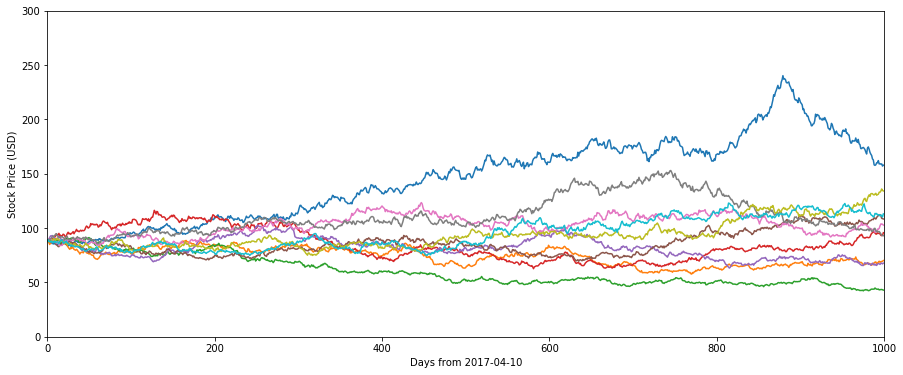

In [31]:
plt.figure(figsize=(15,6))
plt.axis([0, 1000, 0, 300]) #0,250 is the start and end of x axis
plt.xlabel("Days from 2017-04-10")
plt.ylabel("Stock Price (USD)")
plt.plot(price_list)
plt.show()